In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#--> Data Preprocessing

#--> Traning Image Preprocessing
# Train="D:\7-sem-project\potato_crop\Potato\Train"
Train = r"D:\7-sem-project\potato_crop\Potato\Train"
training_set= tf.keras.utils.image_dataset_from_directory(
    Train,
    labels="inferred", #--> Taking Same Name as Directory name
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True, #--> Reducing The BIas Of The Model
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 900 files belonging to 3 classes.


In [3]:
class_name= training_set.class_names
class_name

['Early_blight', 'Late_blight1', 'lat_blight']

In [4]:
# Validation Image Preprocessing
# Valid='D:\7-sem-project\potato_crop\Potato\Valid'
Test = r"D:\7-sem-project\potato_crop\Potato\Test"
validation_set= tf.keras.utils.image_dataset_from_directory(
    Test,
    labels="inferred", #--> Taking Same Name as Directory name
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False, #--> Reducing The BIas Of The Model
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 300 files belonging to 3 classes.


In [5]:
class_name= validation_set.class_names
class_name

['Early_blight', 'healthy', 'late_blight']

In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [7]:
#--> Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
model=Sequential()



In [8]:
# Building Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(0.25))
model.add(Flatten())

# Adding Dense Layer
model.add(Dense(units=1800, activation='relu'))
model.add(Dropout(0.55))

# Adding Output Layer
model.add(Dense(units=3, activation='softmax'))


c:\Users\navu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#--> Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1800)           │    33,179,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         5,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,897,027 (144.57 MB)

 Trainable params: 37,897,027 (144.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#--> Model Training

training_history= model.fit(training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.4067 - loss: 1.6230 - val_accuracy: 0.6033 - val_loss: 0.8347
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.6476 - loss: 0.7424 - val_accuracy: 0.7233 - val_loss: 0.6546
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7601 - loss: 0.5116 - val_accuracy: 0.8833 - val_loss: 0.2342
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.9156 - loss: 0.2268 - val_accuracy: 0.8667 - val_loss: 0.3174
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.8988 - loss: 0.2592 - val_accuracy: 0.9300 - val_loss: 0.1792
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.9426 - loss: 0.1261 - val_accuracy: 0.9633 - val_loss: 0.1141
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9692 - loss: 0.0989 - val_accuracy: 0.9667 - val_loss: 0.1134
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9703 - loss: 0.0764 - val_accuracy: 0.8567 - val_loss

In [11]:
# --> Model Evaluation

#--> Model Evalution on Taining Set
train_loss,train_acc= model.evaluate(training_set)



29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 586ms/step - accuracy: 0.9662 - loss: 0.1059


In [12]:
print(train_loss,train_acc)

0.08775654435157776 0.9688888788223267


In [13]:
#--> Model on Validation set

val_loss,val_acc= model.evaluate(validation_set)




10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - accuracy: 0.9519 - loss: 0.1308


In [14]:
print(val_loss,val_acc)

0.27823349833488464 0.8899999856948853


In [15]:
#--> Saving Model

model.save('trained_model4.keras')

training_history.history

{'accuracy': [0.44333332777023315,
  0.7111111283302307,
  0.8188889026641846,
  0.9222221970558167,
  0.9244444370269775,
  0.95333331823349,
  0.9633333086967468,
  0.9622222185134888,
  0.9522222280502319,
  0.9788888692855835],
 'loss': [1.2413840293884277,
  0.6265262365341187,
  0.4230208992958069,
  0.20891068875789642,
  0.20142440497875214,
  0.10704547166824341,
  0.1061437726020813,
  0.11233579367399216,
  0.12905846536159515,
  0.05816365033388138],
 'val_accuracy': [0.6033333539962769,
  0.7233333587646484,
  0.8833333253860474,
  0.8666666746139526,
  0.9300000071525574,
  0.9633333086967468,
  0.9666666388511658,
  0.8566666841506958,
  0.9733333587646484,
  0.8899999856948853],
 'val_loss': [0.8347209692001343,
  0.654625654220581,
  0.23421615362167358,
  0.3174472451210022,
  0.17919796705245972,
  0.11406237632036209,
  0.11335207521915436,
  0.4424823522567749,
  0.09932427108287811,
  0.27823349833488464]}

In [16]:
#--> Recording History in JSON

import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)


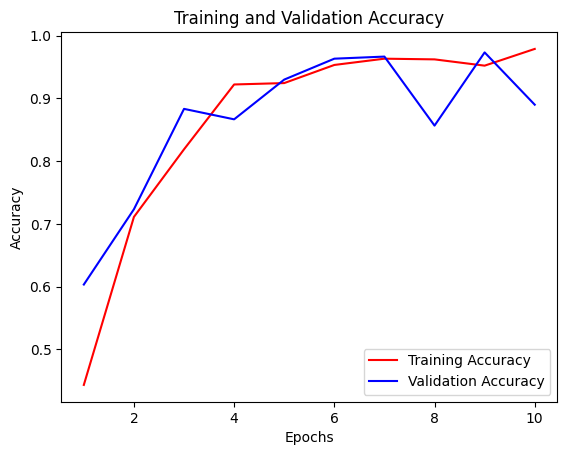

<module 'matplotlib.pyplot' from 'c:\\Users\\navu1\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
#--> Accuracy Visualization

epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt

In [18]:
#--> Some Other Model Evaluation Metrices

class_name=validation_set.class_names
class_name


['Early_blight', 'healthy', 'late_blight']

In [19]:
Test=r"D:\7-sem-project\potato_crop\Potato\Test"
test_set= tf.keras.utils.image_dataset_from_directory(
    Test,
    labels="inferred", #--> Taking Same Name as Directory name
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256
    ),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 300 files belonging to 3 classes.


In [20]:
#--> Performing Prediction

y_pred=model.predict(test_set)
y_pred,y_pred.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 626ms/step


(array([[9.99995351e-01, 1.68508860e-10, 4.64822551e-06],
        [1.00000000e+00, 7.14831089e-17, 4.96165464e-09],
        [9.99989271e-01, 1.73654746e-09, 1.07647047e-05],
        [1.00000000e+00, 3.06554955e-17, 1.57788602e-10],
        [1.00000000e+00, 1.25284703e-14, 1.37284175e-08],
        [9.99993086e-01, 4.13007580e-11, 6.96091547e-06],
        [1.00000000e+00, 3.02198072e-13, 1.96928163e-09],
        [9.99965906e-01, 3.61917551e-10, 3.40333499e-05],
        [1.00000000e+00, 9.74305069e-15, 1.80715656e-08],
        [1.00000000e+00, 2.06253941e-15, 2.72191714e-09],
        [9.99964833e-01, 6.82525370e-10, 3.51779672e-05],
        [9.99999881e-01, 1.43126700e-12, 1.33537526e-07],
        [1.00000000e+00, 2.44702763e-16, 2.17989474e-10],
        [1.00000000e+00, 1.08011491e-17, 6.23047586e-11],
        [9.99960780e-01, 6.52765086e-09, 3.92622715e-05],
        [1.00000000e+00, 7.42153592e-17, 1.30840269e-10],
        [9.99999881e-01, 2.14102932e-13, 1.43902270e-07],
        [1.000

In [21]:
predicted_categories=tf.argmax(y_pred,axis=1) #--> argmax is used for return for index value of the maxvalue
predicted_categories

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1,
     

In [22]:
true_categories=tf.concat([y for x,y in test_set],axis=0) #--> list comprehension Technique
true_categories

<tf.Tensor: shape=(300, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
     

In [23]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true,predicted_categories,target_names=class_name)) #--> Creating Confusion Matrix

cm=confusion_matrix(y_true,predicted_categories)
cm.shape

              precision    recall  f1-score   support

Early_blight       0.84      1.00      0.91       100
     healthy       0.92      0.94      0.93       100
 late_blight       0.92      0.73      0.82       100

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



(3, 3)

Text(0.5, 1.0, 'Crop Disease Prediction Confusion Matrix')

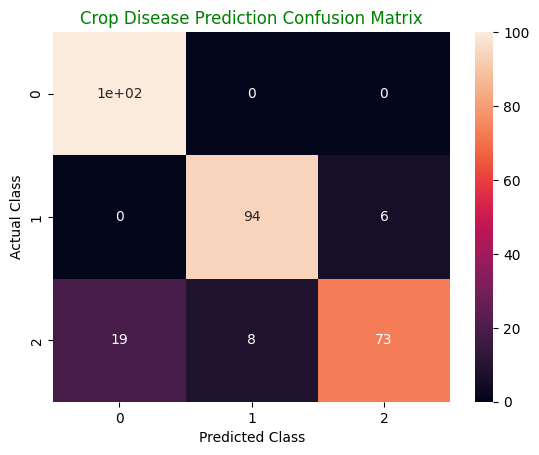

In [25]:
#--> Confusion Matrix Visualization

sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Crop Disease Prediction Confusion Matrix",color='green')

In [26]:
model.save('trained_model2.keras')